In [22]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

##### Após feita a importação, realizo a leitura do DF, fazendo uma primeira análise do DataFrame.

In [23]:
df = pd.read_csv('Stars.csv')

In [24]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


##### Sabendo da necessidade de transformação dos dados STR para INT, utilizo a função LabelEncoder em cada uma das colunas STR, da biblioteca sklearn | preprocessing. Primeiro instanciando a função e após aplicando nas colunas necessárias.

In [26]:
l_e_ = preprocessing.LabelEncoder()

In [27]:
df['Color'] = l_e_.fit_transform(df['Color'])
df['Spectral_Class'] = l_e_.fit_transform(df['Spectral_Class'])

In [28]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,9,0,5
238,9235,404940.000000,1112.0000,-11.23,9,0,5


##### Análisando visualmente a discrepancia entre os dados, verifiquei a necessidade de realizar a normalização. Realizo com a função baixo a normalização de cada uma das colunas, dividindo cada valor, pelo maior valor da coluna.

In [29]:
columns_ = df.columns

for column in columns_:
    if column != 'Type':
        df[column] = df[column] / df[column].max()

In [30]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.076700,2.825457e-09,0.000087,0.803589,0.5000,0.833333,0
1,0.076050,5.886370e-10,0.000079,0.827517,0.5000,0.833333,0
2,0.065000,3.531822e-10,0.000052,0.932203,0.5000,0.833333,0
3,0.070000,2.354548e-10,0.000082,0.830010,0.5000,0.833333,0
4,0.048475,1.624638e-10,0.000053,1.000000,0.5000,0.833333,0
...,...,...,...,...,...,...,...
235,0.973500,4.412776e-01,0.695920,-0.495015,0.0000,1.000000,5
236,0.770975,9.818959e-01,0.612779,-0.529910,0.0000,1.000000,5
237,0.220725,6.327765e-01,0.730305,-0.534895,0.5625,0.000000,5
238,0.230875,4.767253e-01,0.570695,-0.559821,0.5625,0.000000,5


In [31]:
df.shape

(240, 7)

In [32]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df = df.sort_values('Type')

##### A intenção é de realizar uma análise mais aprofundada dos dados, tanto por classe quanto por distribuição dos dados em dimensão|classe.

##### Para isso optei por plotar gráficos de cada dimensão(coluna), fazendo uma análise por classe, para isso optei pela tecnologia plotly, assim consigo análisar tanto individualmente(selecionando) quanto comparar com as demais classes, isso em um unico gráfico. A função abaixo passa por cada uma das colunas do DF, monta a figura, passa por cada uma das classes, e adiciona uma figura violin, box_plot e de pontos, após, altero tamanho, legendas, o nome de classe para sua correspondente á lista disponibilizada no kaggle, e por fim o gráfico é apresentado, isso é repetido para cada uma das colunas. 

##### Esse gráfico foi idealizado por mim, e elaborado com apoio dos colegas José e Diego, que podem ou não o ter utilizado em seus trabalhos. Ambos participaram da elaboração do trecho "fig.add_trace(go.Violin(x = df['Type'][df['Type'] == class_], y = df[column][df['Type'] == class_], name = class_, box_visible = True, points= 'all'))".

In [35]:
for column in columns_[:-1]:

    fig = go.Figure()

    for class_ in range(df['Type'].max()+1):

        fig.add_trace(go.Violin(x = df['Type'][df['Type'] == class_], 
                                y = df[column][df['Type'] == class_], 
                                name = class_, 
                                box_visible = True, 
                                points= 'all'
                                ))

    fig.update_layout(title = f'Gráfico comparativo de {column} entre tipos de estrelas',
                      yaxis_title = column,
                      xaxis_title = 'Classes',
                      height= 600,
                      width= 1000
                      
                      )

    fig.update_traces(marker_line_width = 0.5, 
                      marker_line_color= "black"
                      )

    fig.for_each_trace(
                        lambda t: t.update(
                        name= {"0":"Anão Vermelho", "1":"Anã Marrom ", "2":"Anã Branca", "3":"Sequência Principal", "4":"Supergigantes", "5":"Hipergigantes"}[t.name],
                        legendgroup= {"0":"Anão Vermelho", "1":"Anã Marrom ", "2":"Anã Branca", "3":"Sequência Principal", "4":"Supergigantes", "5":"Hipergigantes"}[t.name])
                        )
    
    fig.show()
            

##### Seguindo a análise, agora das informações por classe, criei a função abaixo que passa por cada uma das classes e retorna - a classe, -todo DF correspondente, - info, - describe. 

##### Desta forma, realizei a análise individual de cada uma das classes. 

In [36]:
for class_ in range(df['Type'].max()+1):

    df_class = df[df.Type == class_]

    print(f'| Classe: {class_} |')

    display(df_class)

    df_class.info()

    display(df_class.describe(include='all'))    
         
    print('='*72)

| Classe: 0 |


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.076700,2.825457e-09,0.000087,0.803589,0.5,0.833333,0
188,0.069450,9.995055e-10,0.000057,0.969591,0.5,0.833333,0
187,0.087100,6.486779e-10,0.000051,0.831007,0.5,0.833333,0
185,0.072225,4.144004e-10,0.000050,0.843968,0.5,0.833333,0
184,0.086325,7.310871e-10,0.000040,0.851446,0.5,0.833333,0
183,0.080450,5.321278e-10,0.000051,0.864407,0.5,0.833333,0
182,0.085475,2.884321e-10,0.000065,0.875374,0.5,0.833333,0
181,0.072850,7.428598e-10,0.000060,0.916750,0.5,0.833333,0
180,0.070775,2.719503e-10,0.000047,0.808076,0.5,0.833333,0
127,0.071525,2.236820e-10,0.000046,0.833001,0.5,0.833333,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     40 non-null     float64
 1   L               40 non-null     float64
 2   R               40 non-null     float64
 3   A_M             40 non-null     float64
 4   Color           40 non-null     float64
 5   Spectral_Class  40 non-null     float64
 6   Type            40 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,40.000000,4.000000e+01,40.000000,40.000000,40.0,40.000000,40.0
mean,0.074949,8.161746e-10,0.000056,0.875548,0.5,0.833333,0.0
std,0.008307,1.045308e-09,0.000013,0.060474,0.0,0.000000,0.0
min,0.048475,1.624638e-10,0.000029,0.800100,0.5,0.833333,0.0
25%,0.070319,3.708413e-10,0.000048,0.832502,0.5,0.833333,0.0
50%,0.073375,6.121824e-10,0.000054,0.854686,0.5,0.833333,0.0
75%,0.081063,8.682395e-10,0.000062,0.914880,0.5,0.833333,0.0
max,0.088275,6.592734e-09,0.000098,1.000000,0.5,0.833333,0.0


| Classe: 1 |


,Temperature,L,R,A_M,Color,Spectral_Class,Type
10,0.090000,3.414094e-09,0.000262,0.532901,0.5,0.833333,1
138,0.083100,4.002731e-09,0.000174,0.609671,0.5,0.833333,1
139,0.088525,1.530456e-09,0.000131,0.714357,0.5,0.833333,1
137,0.089950,1.295001e-09,0.000287,0.710867,0.5,0.833333,1
199,0.086575,3.178640e-09,0.000346,0.736590,0.5,0.833333,1
70,0.083625,2.472275e-08,0.000140,0.613161,0.5,0.833333,1
71,0.090175,2.590003e-08,0.000195,0.504487,0.5,0.833333,1
72,0.082600,1.000683e-08,0.000092,0.658026,0.5,0.833333,1
73,0.078750,1.036001e-08,0.000180,0.595214,0.5,0.833333,1
74,0.088750,4.709096e-09,0.000149,0.542871,0.5,0.833333,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 10 to 79
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     40 non-null     float64
 1   L               40 non-null     float64
 2   R               40 non-null     float64
 3   A_M             40 non-null     float64
 4   Color           40 non-null     float64
 5   Spectral_Class  40 non-null     float64
 6   Type            40 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,40.000000,4.000000e+01,40.000000,40.000000,40.0,40.000000,40.0
mean,0.082096,6.364048e-09,0.000179,0.625123,0.5,0.833333,1.0
std,0.006741,8.629700e-09,0.000079,0.070928,0.0,0.000000,0.0
min,0.065525,2.236820e-10,0.000050,0.504487,0.5,0.833333,1.0
25%,0.078319,1.548115e-09,0.000123,0.566675,0.5,0.833333,1.0
50%,0.082850,3.708413e-09,0.000173,0.628365,0.5,0.833333,1.0
75%,0.088188,7.858303e-09,0.000210,0.676184,0.5,0.833333,1.0
max,0.092300,4.591368e-08,0.000375,0.744766,0.5,0.833333,1.0


| Classe: 2 |


,Temperature,L,R,A_M,Color,Spectral_Class,Type
148,0.193075,1.648183e-10,0.000005,0.738285,0.5625,0.000000,2
141,0.525500,1.765911e-09,0.000006,0.574277,0.0000,0.166667,2
205,0.498000,1.836547e-09,0.000007,0.565304,0.0000,0.166667,2
204,0.458500,1.577547e-09,0.000006,0.559322,0.0000,0.166667,2
203,0.333500,1.283229e-09,0.000006,0.643071,0.0000,0.166667,2
202,0.374550,1.389183e-09,0.000006,0.609671,0.0000,0.166667,2
201,0.392000,1.436274e-09,0.000006,0.594217,0.0000,0.166667,2
200,0.419750,1.648183e-09,0.000006,0.641575,0.0000,0.166667,2
208,0.448000,1.306774e-09,0.000005,0.581256,0.0000,0.166667,2
209,0.484000,1.471592e-09,0.000005,0.579262,0.0000,0.166667,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 148 to 27
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     40 non-null     float64
 1   L               40 non-null     float64
 2   R               40 non-null     float64
 3   A_M             40 non-null     float64
 4   Color           40 non-null     float64
 5   Spectral_Class  40 non-null     float64
 6   Type            40 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,40.000000,4.000000e+01,4.000000e+01,40.000000,40.000000,40.000000,40.0
mean,0.348286,2.865043e-09,5.505902e-06,0.627243,0.251563,0.175000,2.0
std,0.123941,1.049245e-08,8.854039e-07,0.063728,0.320721,0.106418,0.0
min,0.177500,9.418191e-11,4.311008e-06,0.507478,0.000000,0.000000,2.0
25%,0.237219,3.384662e-10,4.775468e-06,0.578016,0.000000,0.166667,2.0
50%,0.334500,8.947282e-10,5.234796e-06,0.615155,0.062500,0.166667,2.0
75%,0.434500,1.445104e-09,6.171414e-06,0.689432,0.562500,0.166667,2.0
max,0.625000,6.592734e-08,7.698229e-06,0.741276,0.875000,0.333333,2.0


| Classe: 3 |


,Temperature,L,R,A_M,Color,Spectral_Class,Type
151,0.223625,4.473641e-05,0.001276,0.005982,0.1875,0.000000,3
39,0.139675,9.641873e-07,0.000508,0.250748,0.9375,0.333333,3
150,0.739000,2.213275e-01,0.003090,-0.199900,0.2500,0.166667,3
152,0.351500,1.285583e-03,0.002948,-0.101695,0.2500,0.000000,3
158,0.325575,1.174919e-03,0.003187,-0.068794,0.2500,0.000000,3
154,0.626750,1.707047e-02,0.003038,-0.198405,0.2500,0.166667,3
155,0.717500,1.976643e-02,0.003285,-0.203888,0.2500,0.166667,3
156,0.653500,1.709402e-02,0.002818,-0.189432,0.2500,0.166667,3
157,0.503000,5.556733e-03,0.003480,-0.169492,0.2500,0.166667,3
159,0.945000,2.388689e-01,0.003521,-0.227318,0.0000,1.000000,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 151 to 93
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     40 non-null     float64
 1   L               40 non-null     float64
 2   R               40 non-null     float64
 3   A_M             40 non-null     float64
 4   Color           40 non-null     float64
 5   Spectral_Class  40 non-null     float64
 6   Type            40 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.0
mean,0.400450,3.775210e-02,0.002274,-0.018316,0.429688,0.312500,3.0
std,0.266531,8.164535e-02,0.001438,0.180139,0.342674,0.325085,0.0
min,0.101925,1.000683e-07,0.000408,-0.234297,0.000000,0.000000,3.0
25%,0.186981,7.413882e-06,0.000661,-0.184571,0.250000,0.125000,3.0
50%,0.314013,8.694168e-04,0.002932,-0.058824,0.250000,0.166667,3.0
75%,0.575750,1.526041e-02,0.003268,0.120887,0.796875,0.333333,3.0
max,0.975000,2.401639e-01,0.005440,0.324327,1.000000,1.000000,3.0


| Classe: 4 |


,Temperature,L,R,A_M,Color,Spectral_Class,Type
47,0.089350,0.235455,0.045676,-0.261216,0.5,0.833333,4
46,0.089375,0.144805,0.023095,-0.337986,0.5,0.833333,4
45,0.090000,0.376728,0.014883,-0.329013,0.5,0.833333,4
44,0.075200,0.329637,0.012830,-0.299103,0.5,0.833333,4
43,0.080000,0.229568,0.008725,-0.359920,0.5,0.833333,4
42,0.081750,0.176591,0.045163,-0.300100,0.5,0.833333,4
41,0.084125,0.400273,0.011804,-0.309073,0.5,0.833333,4
40,0.095650,0.235455,0.009751,-0.345464,0.5,0.833333,4
169,0.234325,0.499776,0.012317,-0.298604,0.0,1.000000,4
100,0.832500,0.282546,0.006159,-0.324028,0.0,0.166667,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 47 to 49
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     40 non-null     float64
 1   L               40 non-null     float64
 2   R               40 non-null     float64
 3   A_M             40 non-null     float64
 4   Color           40 non-null     float64
 5   Spectral_Class  40 non-null     float64
 6   Type            40 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,0.383696,0.355320,0.026251,-0.317544,0.112500,0.920833,4.0
std,0.252170,0.206913,0.014194,0.027919,0.211451,0.188666,0.0
min,0.075200,0.131855,0.006159,-0.371386,0.000000,0.166667,4.0
25%,0.172487,0.232217,0.013215,-0.339357,0.000000,0.833333,4.0
50%,0.320525,0.285071,0.022325,-0.310818,0.000000,1.000000,4.0
75%,0.579531,0.405171,0.041186,-0.297171,0.000000,1.000000,4.0
max,1.000000,0.957124,0.050295,-0.261216,0.500000,1.000000,4.0


| Classe: 5 |


,Temperature,L,R,A_M,Color,Spectral_Class,Type
237,0.220725,0.632776,0.730305,-0.534895,0.5625,0.000000,5
236,0.770975,0.981896,0.612779,-0.529910,0.0000,1.000000,5
235,0.973500,0.441278,0.695920,-0.495015,0.0000,1.000000,5
234,0.547600,0.881178,0.579933,-0.382353,0.2500,0.166667,5
233,0.693475,1.000000,0.642546,-0.378365,0.2500,0.166667,5
232,0.812225,0.763380,1.000000,-0.540379,0.0000,1.000000,5
231,0.955850,0.321196,0.695920,-0.463111,0.0000,1.000000,5
230,0.603625,0.450888,0.766744,-0.440678,0.2500,0.166667,5
119,0.094500,0.235455,0.679497,-0.533400,0.5000,0.833333,5
178,0.302500,0.141273,0.363818,-0.390828,0.2500,0.166667,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 237 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     40 non-null     float64
 1   L               40 non-null     float64
 2   R               40 non-null     float64
 3   A_M             40 non-null     float64
 4   Color           40 non-null     float64
 5   Spectral_Class  40 non-null     float64
 6   Type            40 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,0.285142,0.364068,0.701513,-0.481269,0.368750,0.683333,5.0
std,0.295425,0.234682,0.131158,0.072463,0.197033,0.317576,0.0
min,0.084975,0.087118,0.363818,-0.594217,0.000000,0.000000,5.0
25%,0.090094,0.203668,0.612266,-0.542124,0.250000,0.625000,5.0
50%,0.094150,0.313743,0.694124,-0.494267,0.500000,0.833333,5.0
75%,0.474400,0.430832,0.782653,-0.406157,0.500000,0.833333,5.0
max,0.973500,1.000000,1.000000,-0.377866,0.562500,1.000000,5.0


##### Tanto os gráficos, quanto os dados das classes, quando avaliados se mostraram com excelente qualidade, sem dados nulos ou repetidos, com quantidade identica de dados por tipo de estrela, dados bem distribuidos e cujas dimensões disponiveis, quando agrupadas, visivelmente representavam cada classe, de forma que entendi que o algoritmo conseguiria identificar os padrões sem necessidade de outras manipulações nos dados. 

##### Não identifiquei a necessidade de remoção de outliers.

##### Com os dados prontos, segui para a preparação final dos dados que serão usados para treinar e testar. Feito abaixo a crianção do X - Dados sem a coluna 'type', e y - dados so com a coluna 'type', já os transformo em array numpy e por fim transformo meu y utilizando a função to_categorical, de forma a que cada classe vire um array, com o qual meu algoritmo, que tera 6 neuronios de saída conseguira categorizar e identificar se a saída esta correta.

In [37]:
x = df.drop('Type', axis = 1 )
x = np.array(x)

In [38]:
y = df.drop(df.columns[:-1], axis = 1)
y = np.array(y)

In [39]:
 y = to_categorical(y, 6)

##### Fiz alguns testes, com mais e menos neuronios em ambas as camadas ocultas, com o intuito de chegar em uma quantidade minima que traga uma boa acuracia e baixo erro. Com mais neuronios, 100 na primeira camada e 50 na segunda, o treinamento retornou um baixo loss - 0.0032, e acuracia 1.0, e com menos 30 na primeira e 15 na segunda, ele apresentou resultados que variavam, conforme os testes, chegando a ter acuracia minima de 0.93. Com um unico neuronio, os testes também variaram, porém com loss maior, usando 100 neuronios, o loss ficou com 0.056. 

##### Optei por manter duas camadas, com a segunda tendo metade da quantidade de neuronios da primeira. E como 60 trouxe um bom resultado, em todos os testes, mantive esse como final. 

In [40]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)


In [41]:
model = Sequential()

model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

##### 100 epochs, pois este o valor que me trouxe um bom loss, com acuracia 1.0, valores maiores trazem um loss muito proximo de 0, e menores trazem maior que 0.5, minha intenção era chegar em um loss próximo a 0.01. 

##### O batch_size foi escolhido a partir de testes, a ideia é utilizar um número, cuja divisão pelos dados de treino retorne um inteiro, exemplo: 192 dados de treino / 12 =  16 periodos de treino e correção de erros... batch_size = 12 me trouxe um bom resultado e desempenho. 

In [42]:
model.fit(x_train, y_train, epochs= 100, batch_size= 12)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.7200 - accuracy: 0.3438
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6164 - accuracy: 0.5104
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1.5222 - accuracy: 0.5573
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1.4190 - accuracy: 0.5729
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 1.3053 - accuracy: 0.6146
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 1.1852 - accuracy: 0.6771
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0651 - accuracy: 0.6979
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9463 - accuracy: 0.7448
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8311 - accuracy: 0.7969
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.8281
Epoch 11/

In [43]:
y_predict = model.predict(x_test)

y_predict = np.argmax(y_predict, axis = 1)
y_test = np.argmax(y_test, axis = 1)

acurace =  accuracy_score(y_test, y_predict)

print(acurace)

2/2 [==============================] - 0s 4ms/step
1.0


##### Para simples visualização dos resultados trouxe a classification_report e matriz de confusão, ambas funções sklearn que permitem a visualização dos resultados do teste.

In [44]:
y_predict = pd.DataFrame(y_predict)

y_predict = y_predict.astype(int)

print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



<AxesSubplot:>

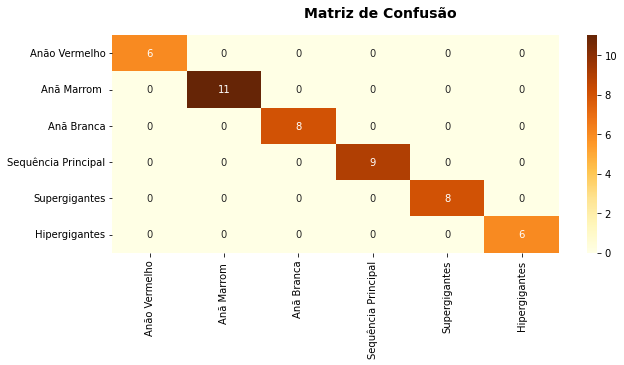

In [45]:
matriz = confusion_matrix(y_predict, y_test)

class_ = ["Anão Vermelho", "Anã Marrom ","Anã Branca", "Sequência Principal", "Supergigantes","Hipergigantes"]

fig = plt.figure(figsize=(10,4))

fig.suptitle(f'Matriz de Confusão ', fontsize=14, fontweight='bold')

sns.heatmap(matriz, annot=True, cmap = 'YlOrBr', xticklabels= class_, yticklabels= class_)


In [46]:
matriz

array([[ 6,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  6]])